In [200]:
%reload_ext autoreload
%autoreload

import models.PlottingData as PlottingData

import models.NeuralNetwork as NeuralNetwork
import models.NeuralNetworkAutoTuning as NeuralNetworkAutoTuning

import importlib

importlib.reload(NeuralNetwork)  # Reload module
importlib.reload(NeuralNetworkAutoTuning)  # Reload module
importlib.reload(PlottingData)  # Reload module

from models.PlottingData import PlottingData

from models.NeuralNetwork import TitanicSurvivalModel
from models.NeuralNetworkAutoTuning import TitanicSurvivalModelAutoTuning

✅ Dataset caricato con successo!

📋 Informazioni generali:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
None

🔍 Prime righe del dataset:
   PassengerId Survived  Pclass  \
0            1       No       3   
1            2      Yes       1   
2            3      Yes       3   
3           

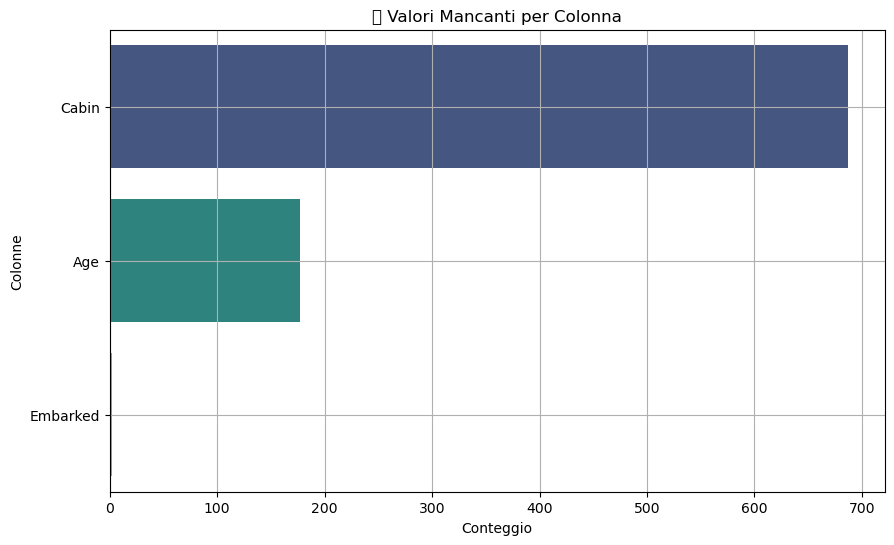

Survived
0    549
1    342
Name: count, dtype: int64

✅ Preprocessing completato!
Features finali: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Has_Cabin', 'Family_Size', 'Is_Alone', 'Age_Group', 'Fare_Group']


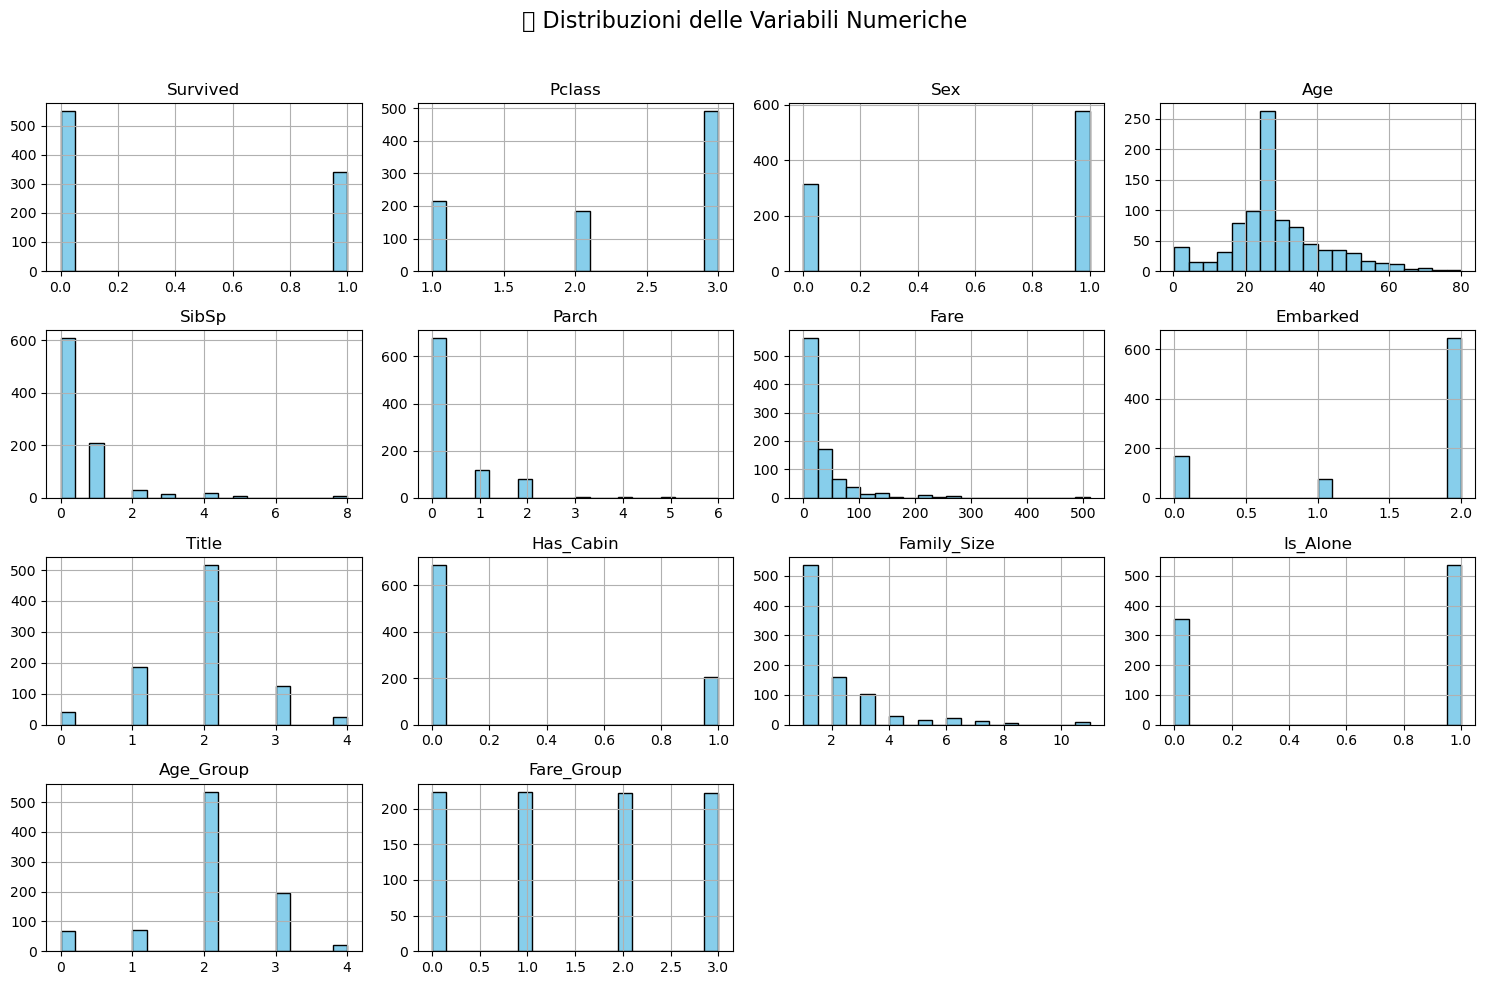

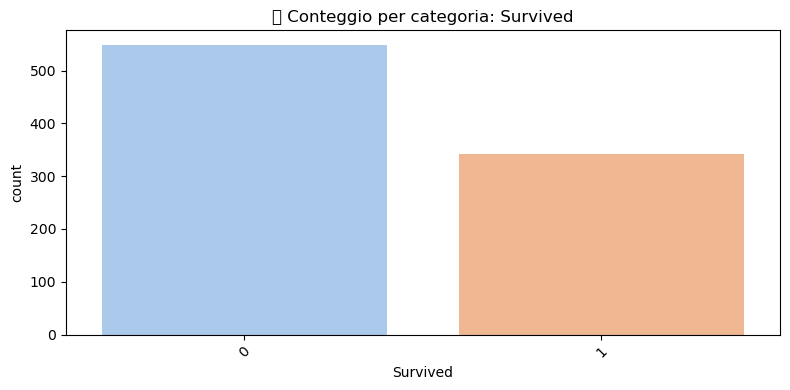

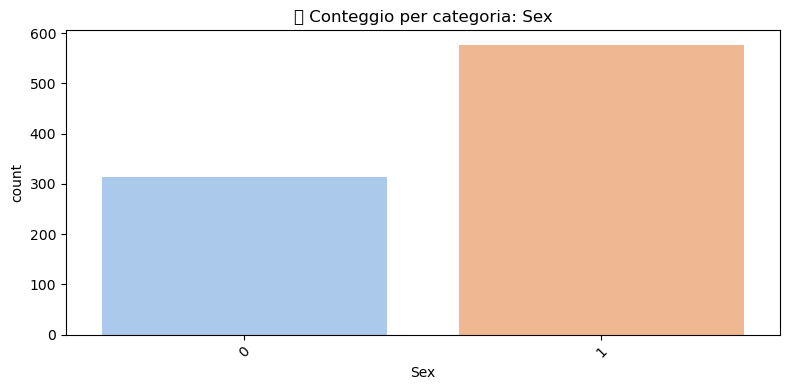

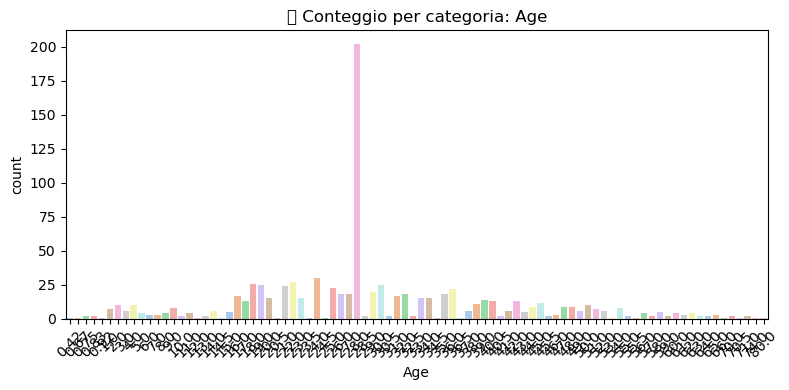

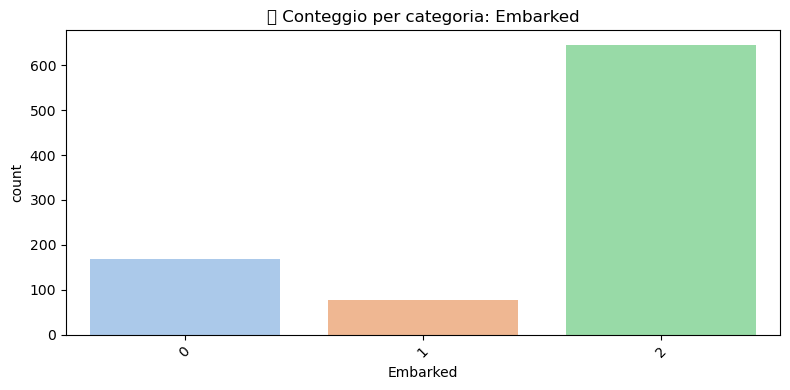

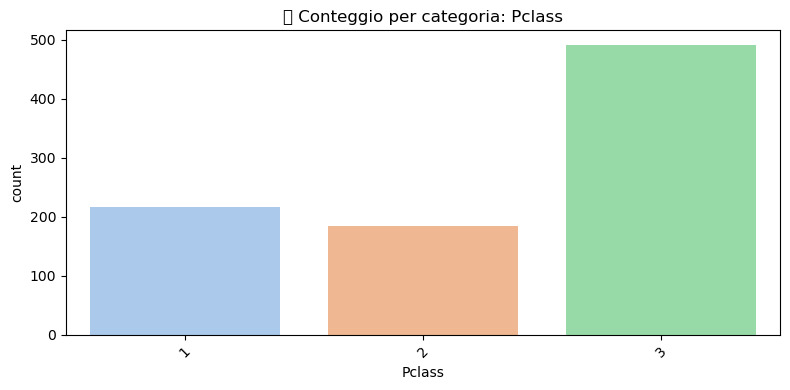

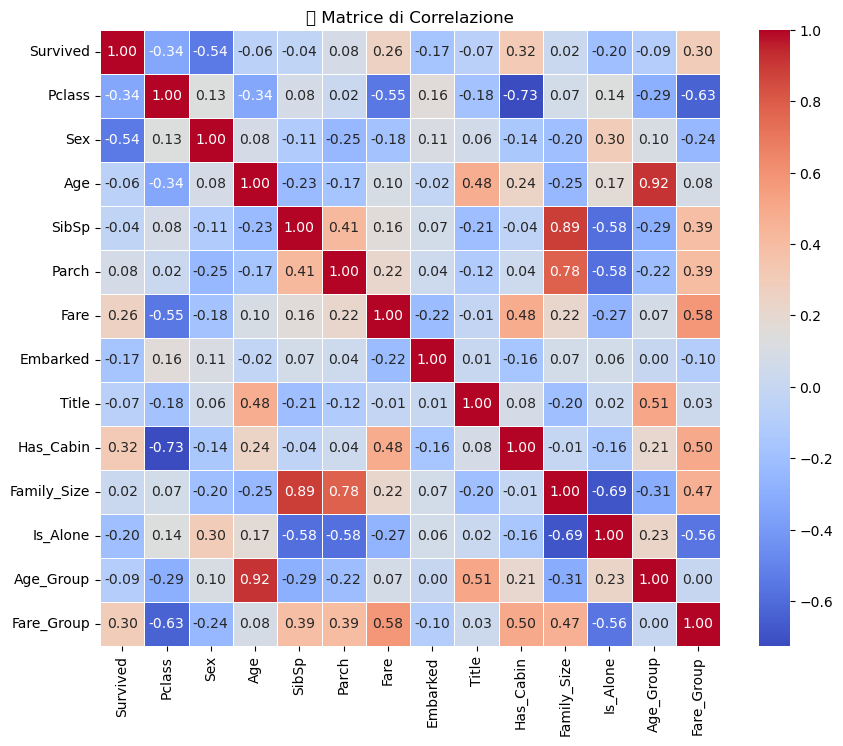

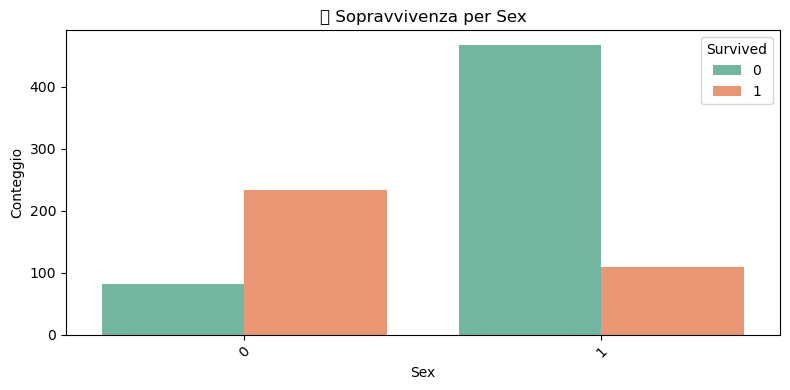

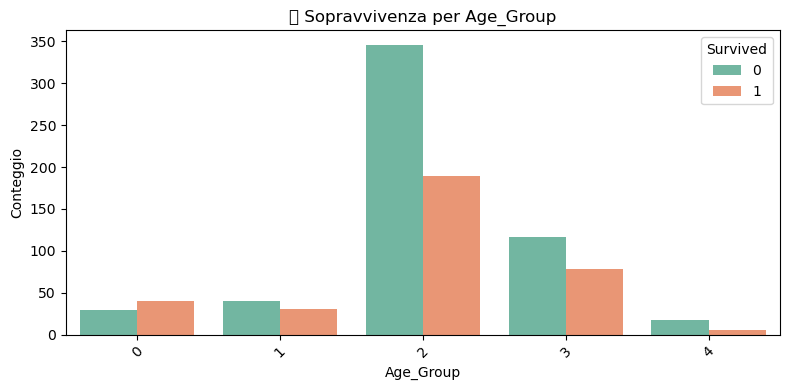

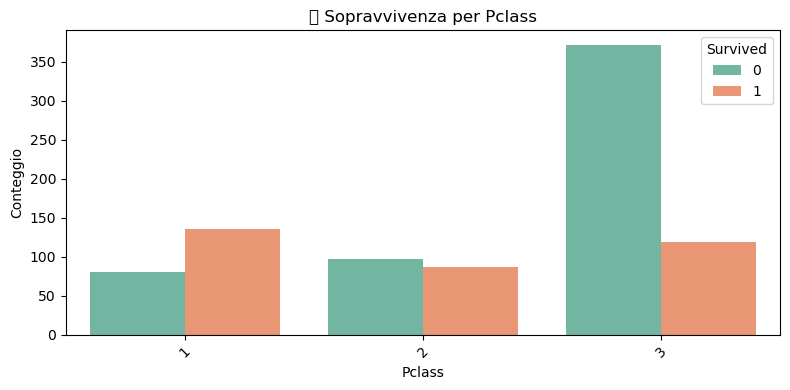

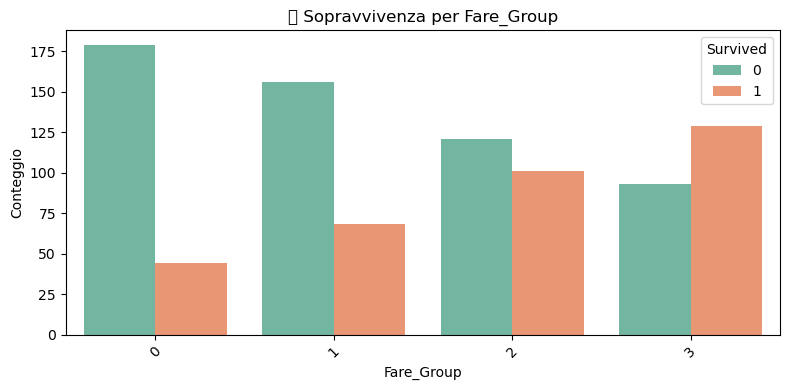

In [201]:
plotter = PlottingData("data/dataset.csv")

plotter.show_info()
plotter.missing_values()
plotter.preprocessing()
plotter.plot_numerical_distributions()
plotter.plot_categorical_counts()
plotter.plot_correlation_matrix()
plotter.survival_by_feature("Sex")
plotter.survival_by_feature("Age_Group")
plotter.survival_by_feature("Pclass")
plotter.survival_by_feature("Fare_Group")


✅ Preprocessing completato!
Features finali: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Has_Cabin', 'Family_Size', 'Is_Alone', 'Age_Group', 'Fare_Group']
Epoch 1/37


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5436 - f1_score: 0.5696 - loss: 0.8482 - precision: 0.4406 - val_accuracy: 0.7267 - val_f1_score: 0.5229 - val_loss: 0.6768 - val_precision: 0.5783
Epoch 2/37
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6749 - f1_score: 0.5686 - loss: 0.6507 - precision: 0.5751 - val_accuracy: 0.7640 - val_f1_score: 0.5229 - val_loss: 0.6563 - val_precision: 0.6267
Epoch 3/37
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6689 - f1_score: 0.5709 - loss: 0.6252 - precision: 0.5726 - val_accuracy: 0.7764 - val_f1_score: 0.5229 - val_loss: 0.6351 - val_precision: 0.6615
Epoch 4/37
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7091 - f1_score: 0.5773 - loss: 0.5781 - precision: 0.6233 - val_accuracy: 0.7764 - val_f1_score: 0.5229 - val_loss: 0.6175 - val_precision: 0.6842
Epoch 5/37
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7305 - f1_score: 0.5742 - loss: 0.5740 - precision: 0.6490 - val_accuracy: 0.8075 - val_f1_sco

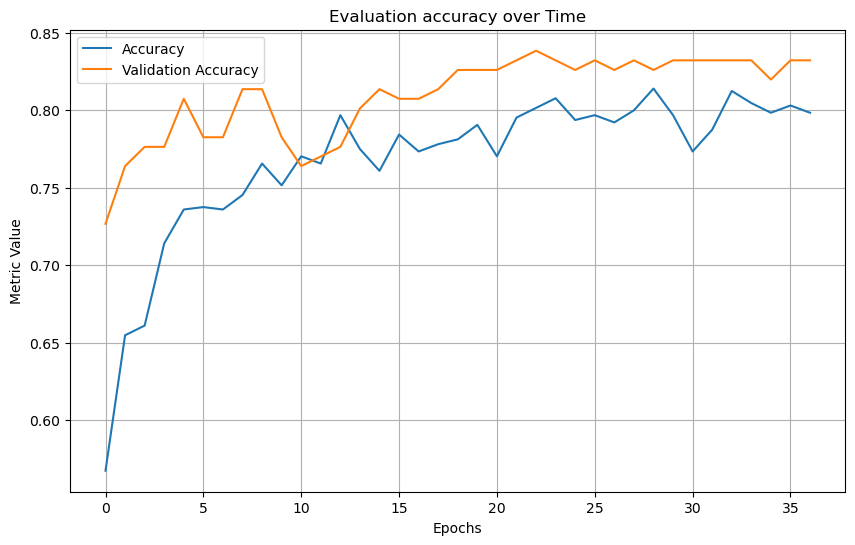

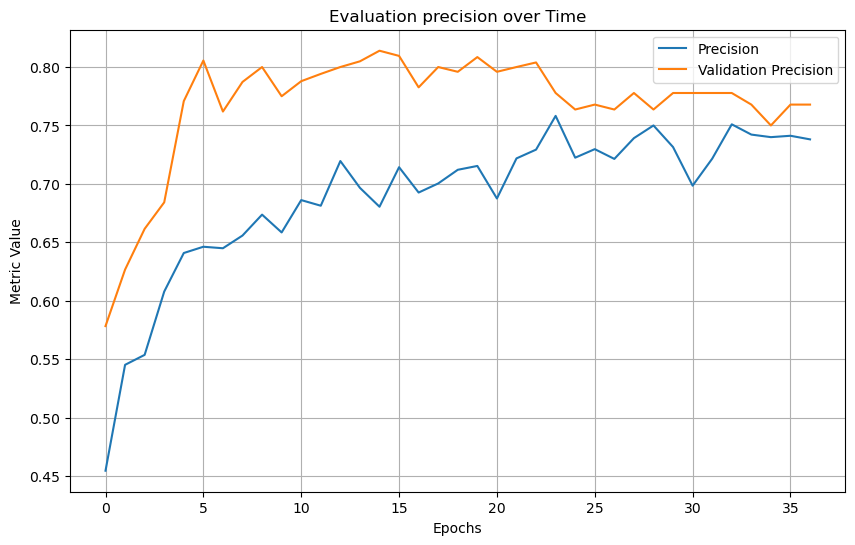

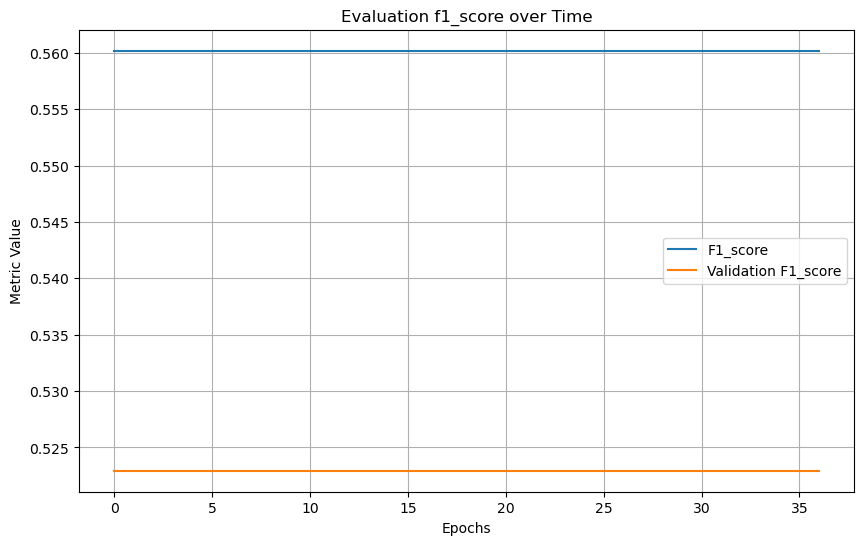

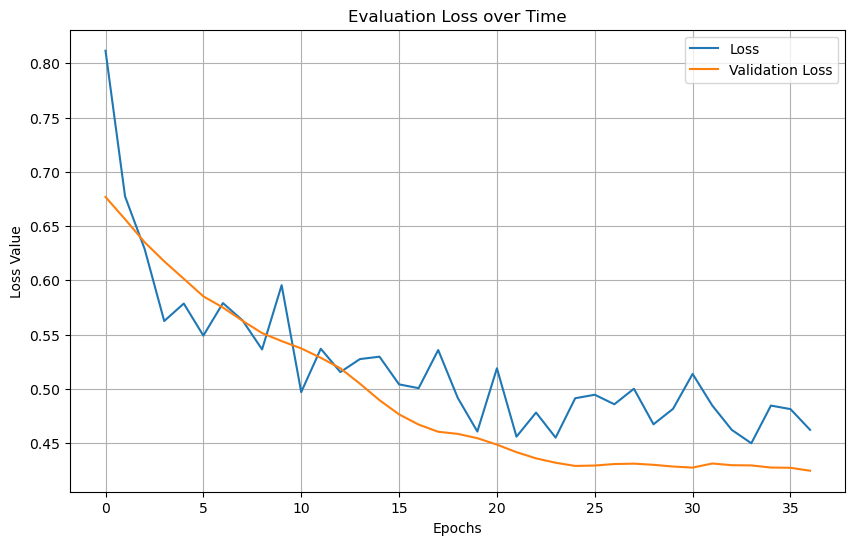

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


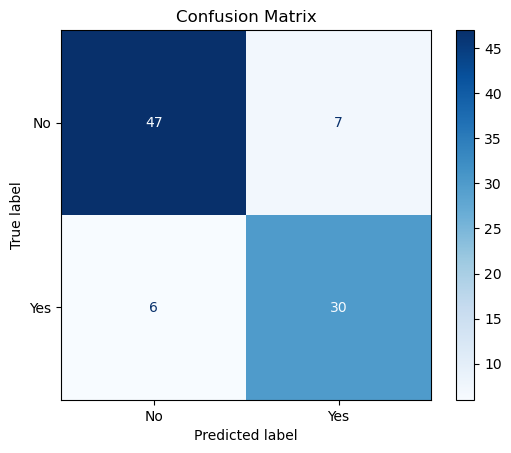

In [202]:
model = TitanicSurvivalModel(dataset_path = 'data/dataset.csv',
                             epochs = 37,
                             batch_size = 64,
                             test_split = 0.1,
                             validation_split = 0.2,
                             learning_rate = 5e-4,
                            )

model.load_and_preprocess_data()
model.build_model()
model.train()
model.evaluate()
model.plot_metrics()
model.plot_loss()
model.plot_confusion_matrix()

In [203]:
# model_autotuning = TitanicSurvivalModelAutoTuning(dataset_path = 'data/dataset.csv')

# model_autotuning.load_and_preprocess_data()
# model_autotuning.tune_model()
# model_autotuning.train_best_model()
# model_autotuning.evaluate()
# model_autotuning.plot_metrics()
# model_autotuning.plot_loss()
# model_autotuning.plot_confusion_matrix()

In [ ]:
tuner = kt.RandomSearch(
    self.model_builder,
    objective=kt.Objective('val_accuracy', direction='max'),
    max_trials=self.max_trials, # 10
    executions_per_trial=2,
    directory='keras_tuner',
    project_name='titanic_tuning'
)

tuner.search(
    self.X_train, 
    self.y_train,
    epochs=self.epochs, # 100
    alidation_split=self.validation_split, # 0.2
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)